In [322]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
from matplotlib import gridspec 
import matplotlib.ticker as mtick

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

import pydotplus
from IPython.display import Image


In [323]:
data = pd.read_csv("pokemon.csv")
data.head(10).style

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13,1,0
2,"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100,1,0
3,"['Blaze', 'Solar Power']",0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,nan,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,nan,19,1,0
5,"['Blaze', 'Solar Power']",0.25,1,1,2,0.5,0.5,0.5,1,1,0.25,0,1,1,1,1,4,0.5,2,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,nan,9,1,0
7,"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,nan,22.5,1,0
8,"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,nan,85.5,1,0
9,"['Shield Dust', 'Run Away']",1,1,1,1,1,0.5,2,2,1,0.5,0.5,1,1,1,1,2,1,1,30,3840,70,195,255,Worm Pokémon,35,1000000,0.3,45,Caterpieキャタピー,Caterpie,50,10,20,20,45,bug,nan,2.9,1,0


In [324]:
data.shape

(801, 41)

In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

In [326]:
data = data.drop(["classfication", "name", "japanese_name", "generation", "against_bug", "against_dark", "against_dragon", "against_electric", "against_fairy", "against_fight", "against_fire", "against_flying", "against_ghost", "against_grass", "against_ground", "against_ice", "against_normal", "against_poison", "against_psychic", "against_rock", "against_steel", "against_water","base_egg_steps"], axis = 1)

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 18 columns):
abilities            801 non-null object
attack               801 non-null int64
base_happiness       801 non-null int64
base_total           801 non-null int64
capture_rate         801 non-null object
defense              801 non-null int64
experience_growth    801 non-null int64
height_m             781 non-null float64
hp                   801 non-null int64
percentage_male      703 non-null float64
pokedex_number       801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
type1                801 non-null object
type2                417 non-null object
weight_kg            781 non-null float64
is_legendary         801 non-null int64
dtypes: float64(3), int64(11), object(4)
memory usage: 112.8+ KB


In [328]:
data = data.drop([773])

In [329]:
data = data.drop(["percentage_male", "pokedex_number"],axis=1)

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 800
Data columns (total 16 columns):
abilities            800 non-null object
attack               800 non-null int64
base_happiness       800 non-null int64
base_total           800 non-null int64
capture_rate         800 non-null object
defense              800 non-null int64
experience_growth    800 non-null int64
height_m             780 non-null float64
hp                   800 non-null int64
sp_attack            800 non-null int64
sp_defense           800 non-null int64
speed                800 non-null int64
type1                800 non-null object
type2                416 non-null object
weight_kg            780 non-null float64
is_legendary         800 non-null int64
dtypes: float64(2), int64(10), object(4)
memory usage: 106.2+ KB


In [331]:
data.head(10).style
pd.to_numeric(data["capture_rate"])
data = data.astype({"capture_rate" : int})

In [332]:
data = data.drop(["abilities", "capture_rate"], axis=1)

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 800
Data columns (total 14 columns):
attack               800 non-null int64
base_happiness       800 non-null int64
base_total           800 non-null int64
defense              800 non-null int64
experience_growth    800 non-null int64
height_m             780 non-null float64
hp                   800 non-null int64
sp_attack            800 non-null int64
sp_defense           800 non-null int64
speed                800 non-null int64
type1                800 non-null object
type2                416 non-null object
weight_kg            780 non-null float64
is_legendary         800 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 93.8+ KB


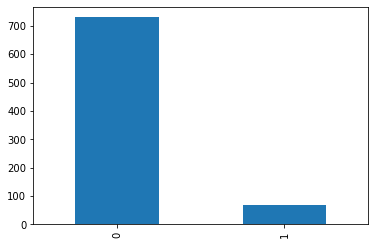

In [334]:
ax = data["is_legendary"].value_counts().plot(kind="bar")

[0 1] [730  70]
[0.9125 0.0875]
365.0 730


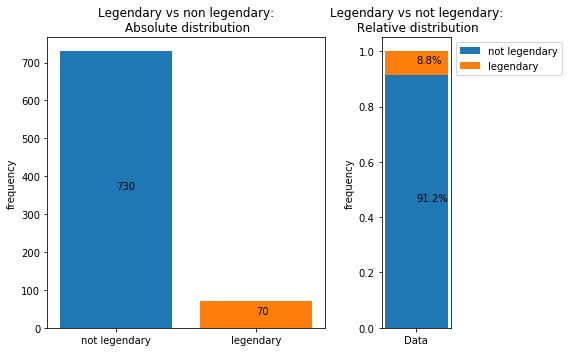

In [335]:
keys, counts = np.unique(data.is_legendary, return_counts=True)
print(keys,counts)
counts_norm = counts/counts.sum()
print(counts_norm)

fig = plt.figure(figsize=(8,5))
gs = gridspec.GridSpec(1,2, width_ratios=[4,1])

ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['not legendary', 'legendary'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Legendary vs non legendary:\n Absolute distribution') 
ax0 = plt.ylabel('frequency')
ax0 = plt.text(['not legendary'], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(['legendary'], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

print(counts[0]/2, counts[0])

ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Data'], [counts_norm[0]], label='not legendary')
ax1 = plt.bar(['Data'], [counts_norm[1]], bottom=counts_norm[0], label='legendary')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Legendary vs not legendary:\n Relative distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Data'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Data'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

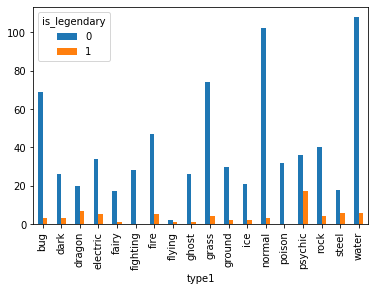

In [336]:
ax = data.groupby(["type1", "is_legendary"])["is_legendary"].count().unstack().plot.bar()

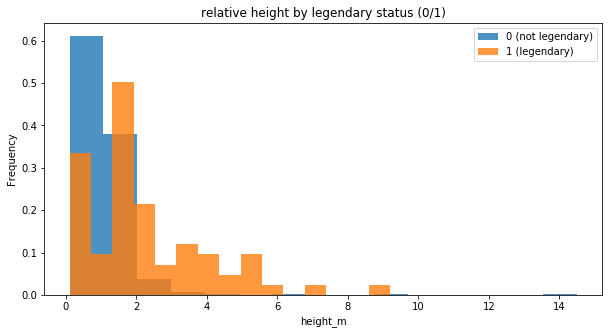

In [337]:
ax = data['height_m'].loc[data['is_legendary'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (not legendary)', figsize = (10,5))
ax = data['height_m'].loc[data['is_legendary'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (legendary)', figsize = (10,5))
ax.set_xlabel('height_m')
ax.set_title('relative height by legendary status (0/1)')
ax.legend();

In [338]:
data = pd.get_dummies(data, columns=["type1", "type2"],prefix=["type1", "type2"])
data = data.fillna(0)

In [339]:
x,y = data.loc[:, data.columns != "is_legendary"], data["is_legendary"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=12345)

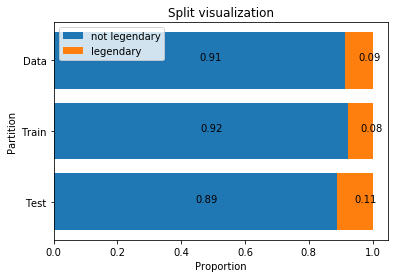

In [340]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = data['is_legendary'].value_counts() / len(data)

fig, ax = plt.subplots()

ax.barh(['Test','Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='not legendary')
ax.barh(['Test','Train','Data'], [test_dist[1], train_dist[1], data_dist[1]], left=[test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='legendary')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['Test', 'Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], [test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

In [341]:
clf = DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=3, min_samples_leaf=3)

clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [342]:
y_pred = clf.predict(x_test)

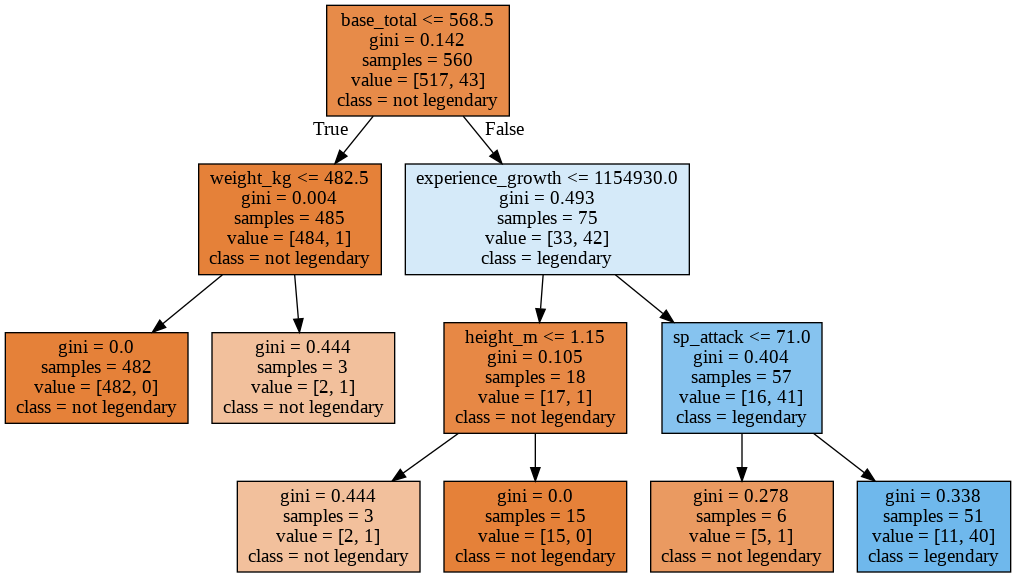

In [343]:


#Decision tree plot
import pydotplus
from IPython.display import Image 

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x_train.columns, 
                                class_names=['not legendary', 'legendary'], filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf.png") #uncomment this line to save the plot as a .png file

In [344]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([x.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]

print ("Accuracy is: ", (accuracy_score(y_test,y_pred)*100).round(2))

Accuracy is:  96.67


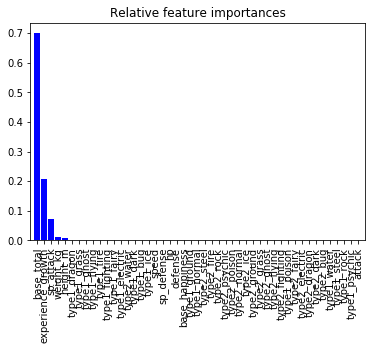

In [345]:
# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="b",  align="center")
plt.xticks(range(x.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

In [346]:
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(x_train, y_train) #ONLY APPLIED TO TRAINING!!!

In [347]:
clf_sm = DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=3, min_samples_leaf=3)
clf_sm.fit(X_sm, y_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [348]:
y_pred_sm = clf_sm.predict(x_test)

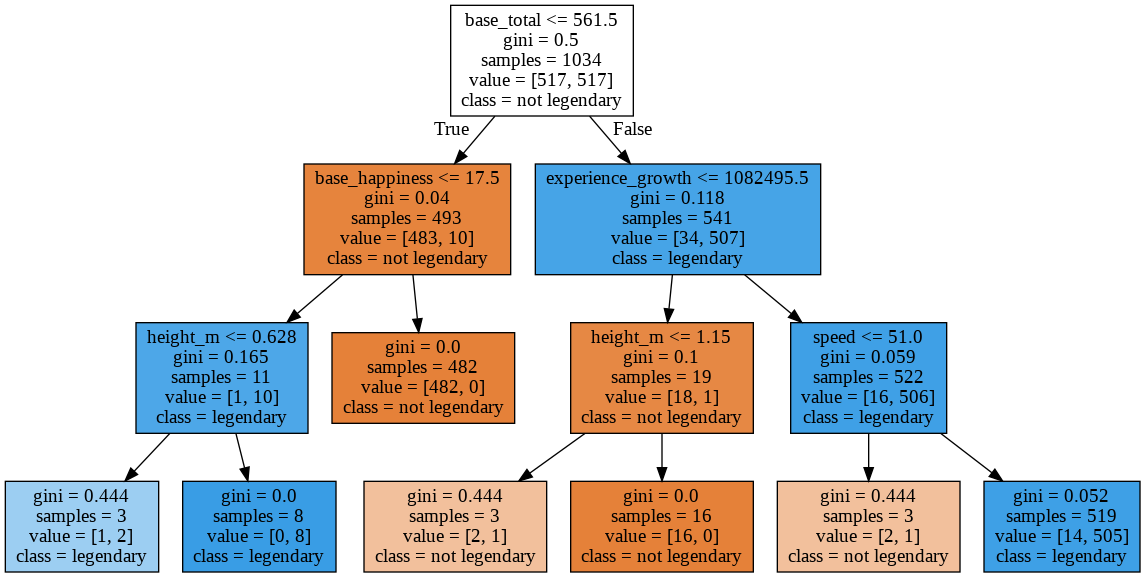

In [349]:

#Decision tree plot
import pydotplus
from IPython.display import Image 

# Create DOT data
dot_data = tree.export_graphviz(clf_sm, out_file=None, 
                                feature_names=x_train.columns, 
                                class_names=['not legendary', 'legendary'], filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf.png") #uncomment this line to save the plot as a .png file

In [350]:
print ("Accuracy is: ", (accuracy_score(y_test,y_pred_sm)*100).round(2))

Accuracy is:  95.83


In [351]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

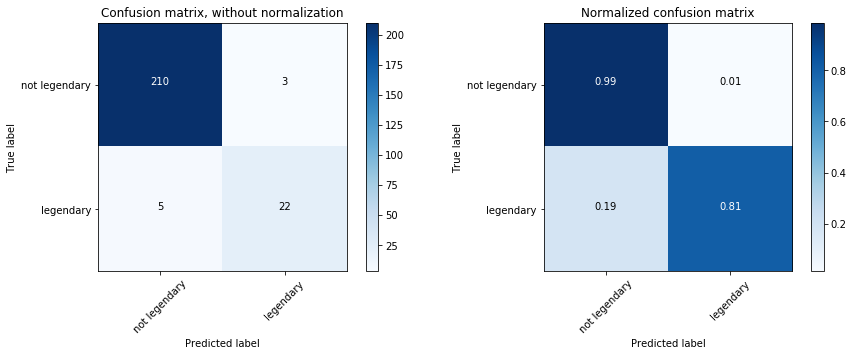

In [352]:
# Compute confusion matrix
class_names = ['not legendary', 'legendary']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


plt.show()

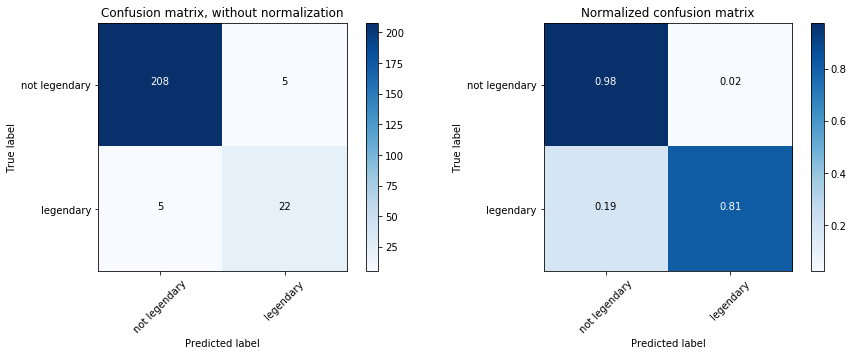

In [353]:
# Compute confusion matrix
class_names = ['not legendary', 'legendary']
cnf_matrix = confusion_matrix(y_test, y_pred_sm)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


plt.show()

In [354]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC score on Testing: " + str(roc_auc))

AUC score on Testing: 0.9003651538862807


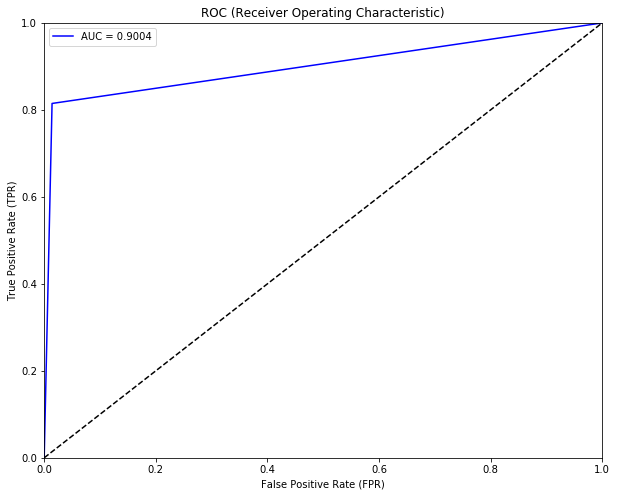

In [355]:
fig, axs = plt.subplots(1,1, figsize=(10,8))

plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr, tpr, 'b', label='AUC = %0.4f'% roc_auc)
plt.legend(loc='best')
plt.plot([0,1],[0,1],color='black', linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)');

In [356]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sm)
roc_auc = auc(fpr, tpr)
print("AUC score on Testing: " + str(roc_auc))

AUC score on Testing: 0.8956703182055296


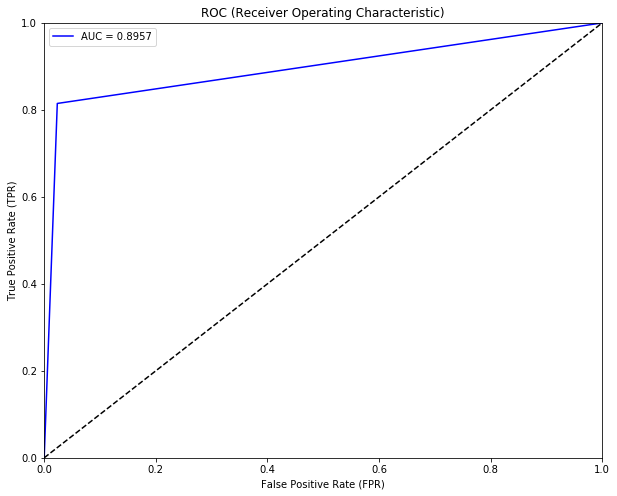

In [357]:
fig, axs = plt.subplots(1,1, figsize=(10,8))

plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr, tpr, 'b', label='AUC = %0.4f'% roc_auc)
plt.legend(loc='best')
plt.plot([0,1],[0,1],color='black', linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)');